##### Dataset

In [3]:
# banknotes.csv,
# location: https://mitu.co.in/dataset

##### Import the libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the data

In [7]:
df = pd.read_csv('datasets/banknotes.csv')

In [8]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


##### Seperate the input and output variables

In [10]:
# input features
x = df.drop('Class', axis = 1)

# output labels
y = df['Class']

In [11]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


###### Explore the data

In [13]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

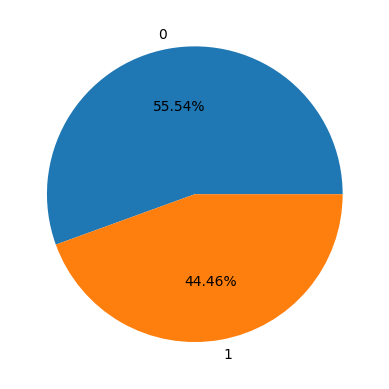

In [15]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

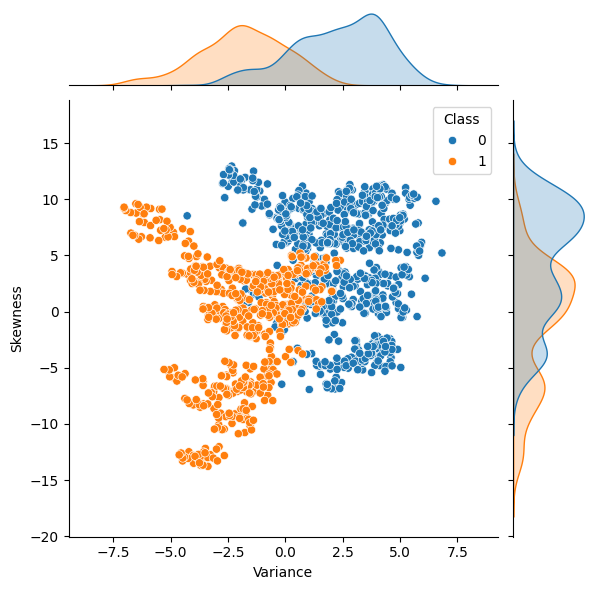

In [16]:
sns.jointplot(x='Variance',y='Skewness',data=df, hue='Class')

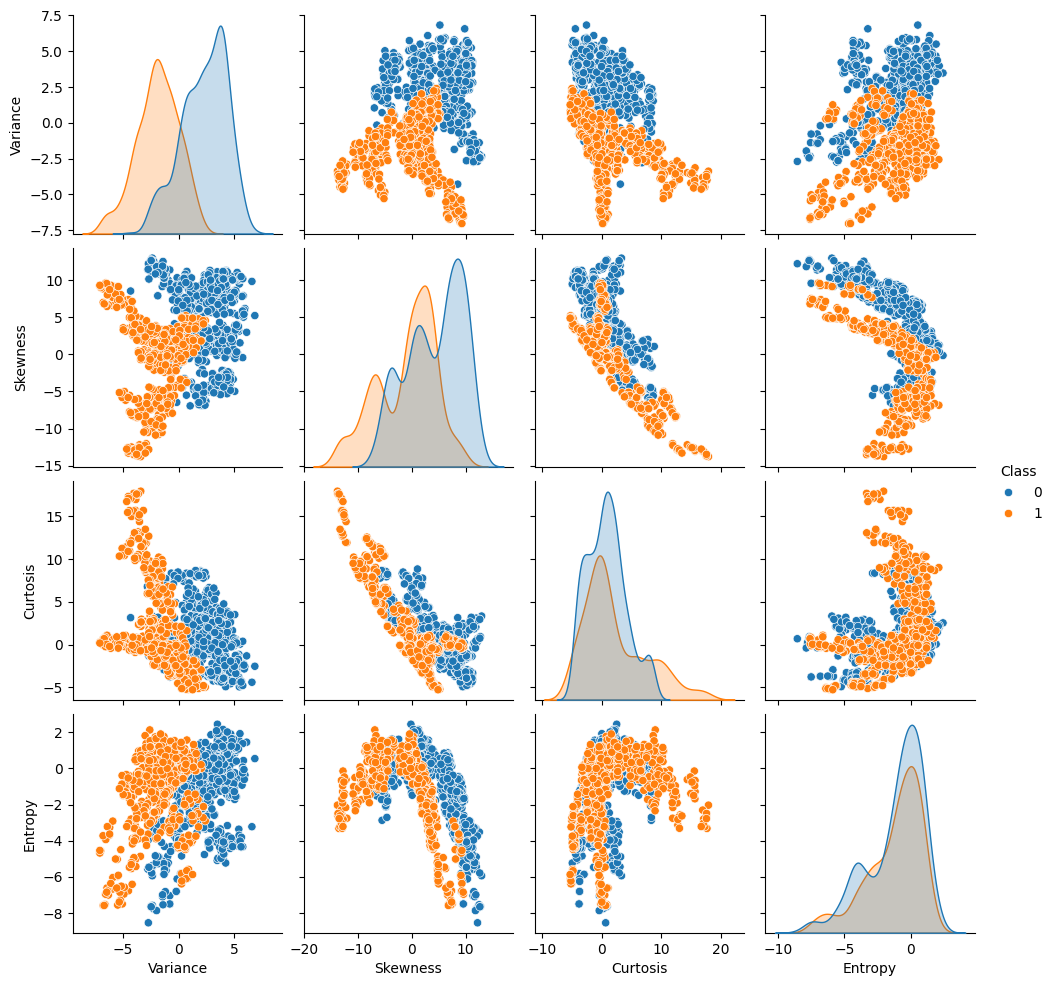

In [17]:
sns.pairplot(df, hue='Class')

##### Cross Validation

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [21]:
x_train.shape

(1029, 4)

In [22]:
x_test.shape

(343, 4)

##### Build the model

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf_tree = DecisionTreeClassifier(random_state=0)

In [28]:
# train thw algorithm
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

##### Performance Evaluation

In [30]:
y_pred = clf_tree.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [32]:
print(confusion_matrix(y_test, y_pred))

[[191   4]
 [  3 145]]


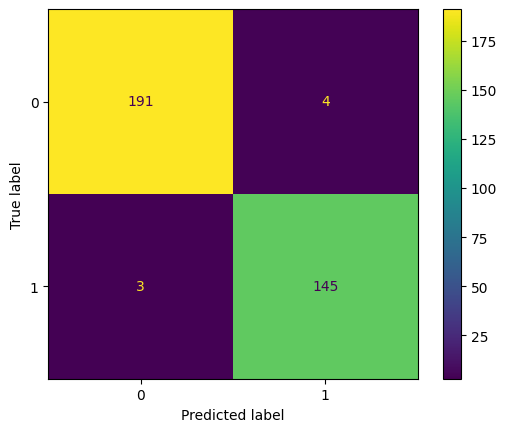

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



###### Visualize the tree

In [36]:
from sklearn.tree import plot_tree

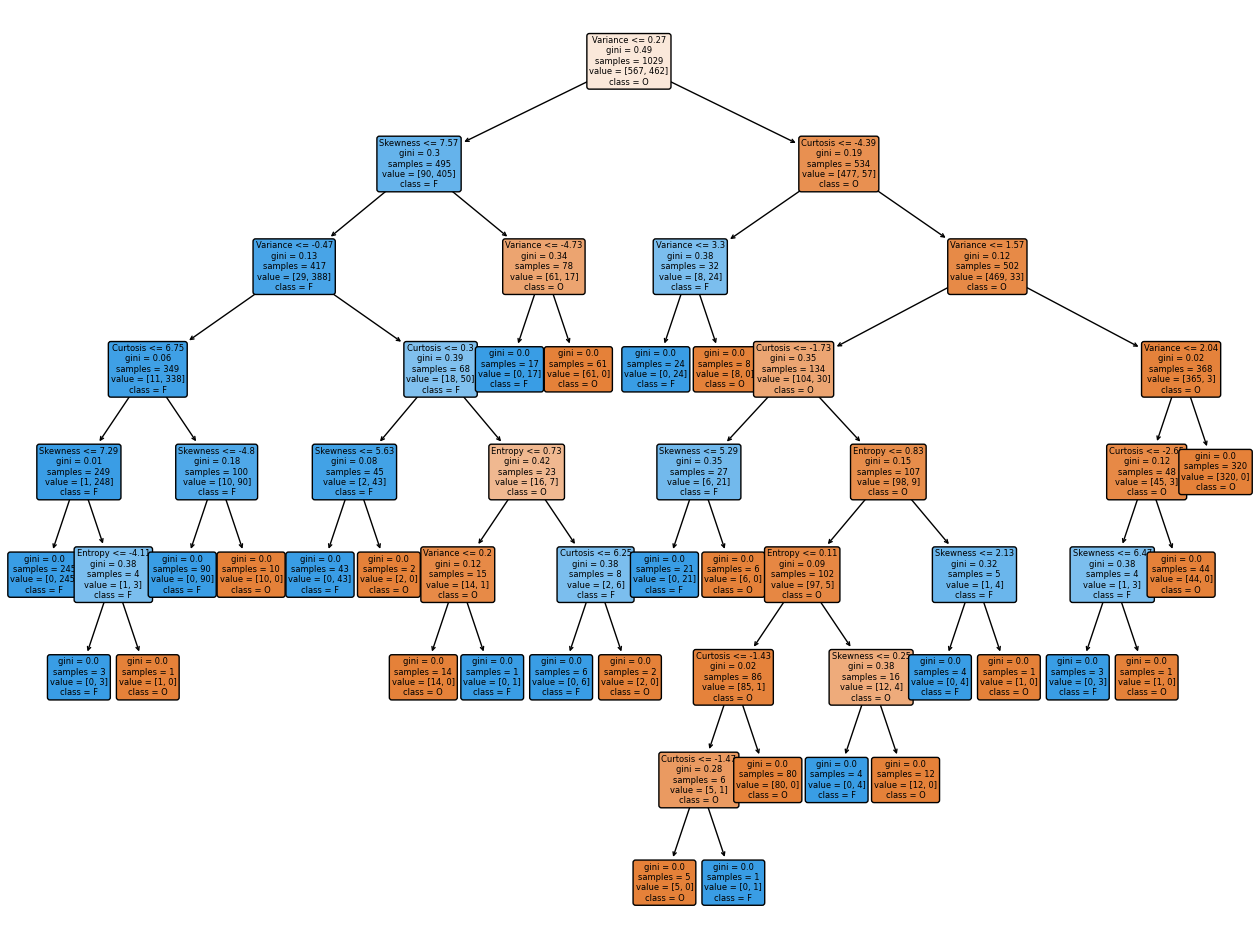

In [49]:
plt.figure(figsize=(16,12))
plot_tree(clf_tree, fontsize=6, feature_names=x.columns,
         filled=True, precision=2, class_names=['O','F'],
         rounded=True);
plt.savefig('tree.png')

<BarContainer object of 4 artists>

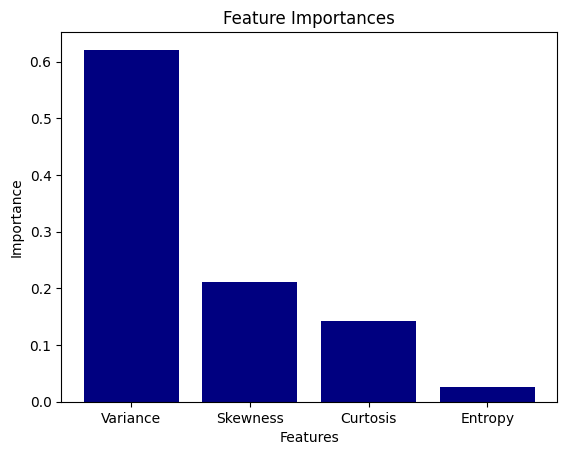

In [51]:
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, clf_tree.feature_importances_, color='navy')

###### Prediction on unseen data

In [54]:
new = pd.DataFrame(data=[[3.45660, 9.52280, -4.0112, -3.59440],
                         [0.40614, 1.34920, -1.4501, -0.55949],
                         [3.86600, -2.63830, 1.9242, 0.10645]], 
                         columns=x.columns)

In [55]:
new

,Variance,Skewness,Curtosis,Entropy
0,3.45660,9.5228,-4.0112,-3.59440
1,0.40614,1.3492,-1.4501,-0.55949
2,3.86600,-2.6383,1.9242,0.10645


In [57]:
v = float(input('Enter variance: '))
s = float(input('Enter skewness: '))
c = float(input('Enter curtosis: '))
e = float(input('Enter entropy : '))
data = pd.DataFrame(data=[[v,s,c,e]], columns=x.columns)
pred = clf_tree.predict(data)
if pred[0] == 0:
    print('Original Note')
else:
    print('Fake Note')

Enter variance:  0.6567
Enter skewness:  3.4774
Enter curtosis:  0.3637
Enter entropy :  -3.455


Original Note


In [58]:
clf_tree.predict(new)

array([0, 1, 0])